# 分析目的

一、加载数据：读取数据文件，设置id为index

二、预处理数据：1、熟悉数据类型，数量，空值，缺失值，异常值；2、提取业务需求的记录（2019年）；
           3、提取付款时间跟订单时间间隔30min的记录；4、提取订单金额和付款金额大于零的记录；
三、清洗数据：理解每个列的记录，观察总数量、类别数量、异常值情况、数据之间的逻辑关系、
           1、对orderID要进行去除重复；2、对userID的用户名称进行修正；
           3、对goodsID列进行名称修正；4、对chanelID进行名称修正；
           5、对platformType的名称进行修正；6、梳理orderAmount和payment的逻辑关系-后者不能大于前者，即付款不能大于订单款
四、分析数据： 统计列记录的个数、去重个数、累计和，分类的个数、(销量/订单数/用户数)与时间的关系、(渠道/用户/商品)与销量的关系、
          客户的RFM等级评定。
           1、销售总金额、成交总金额、实际成交总金额、订单数、用户数、商品数、退货订单数、退货率
           2、与时间的关系：1.(月/周/日/时)的成交量趋势，2.(月/周/日/时)的订单数趋势，
                      3.(月/周/日/时)的用户数趋势，4.(月/周/日/时)的退货数趋势,
                      5.用户活跃度——复购率(大于一个订单数/用户数)与月份的关系                    
                      6.用户活跃度——复购周期（第一次销售后第二次消费时间差）                    
           3、与渠道来源的关系：1.用户/销量/订单与渠道的关系
           4、客户的RFM等级评定

五、总结及建议：1、根据(成交量、订单数、用户数)与时间的关系，解释时间数量变化的原因，对异常变化进行修正建议
           2、根据(成交量、订单数、用户数)与渠道的关系，判断引流渠道的质量，对渠道的留存和开发进行有效建议
           3、根据(销量/商品)与用户的关系图，判断用户偏好、畅销滞销商品
           6、根据复购率判断用户粘性，给与建议


# 一、加载数据

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import os
os.chdir(r'C:\Users\Administrator.SC-201907081817\Desktop\Data_Analysis\Business _case_Analysis_1')

In [2]:
df = pd.read_excel('order2019.xlsx',index_col='id')

# 二、预处理数据

1、熟悉数据类型，数量，空值，缺失值，异常值；
2、提取业务需求的记录（2019年）；
3、提取付款时间跟订单时间间隔30min的记录；
4、提取订单金额和付款金额大于零的记录；

In [3]:
#1、熟悉数据类型，数量，空值，缺失值，异常值；
#df.info()  # 数据量：104557，其中只有chanelID -104549 有空值，需要处理 
#  orderAmount  payment 是 float64， orderTime  payTime 是 datetime64[ns]  不需要转换格式
#df.head()   # platformType 有异常，很多空格，需要处理
#df.orderID.nunique()  #订单数量为104530 小于104557 说明有重复订单，需要去重
#df.userID.nunique()  #用户数为79357，远小于订单数，说明有大量用户重复购买
#df.goodsID.nunique() #商品数为1001，说明出售商品有1001中
#df.chanelID.nunique() # 渠道15个
#df.platformType.nunique() #访问平台11个
#df.chargeback.value_counts() # ‘是’、‘否’两种类型
df.head()

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.51,272.51,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.93,337.93,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.68,891.23,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.27,688.88,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.77,542.51,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否


In [4]:
#2、提取业务需求的记录（2019年）；
#定义起始与结束时间
startTime,endTime = datetime.datetime(2019,1,1),datetime.datetime(2020,1,1)
#删除2019.1.1之前和2020.1.1之后的订单记录
df.drop(index=df[df.orderTime<startTime].index,inplace=True)
df.drop(index=df[df.orderTime>=endTime].index,inplace=True)

In [5]:
#3、提取付款时间跟订单时间小于间隔30min的记录；
#创建时间间隔列
df['payInterval']=(df.payTime-df.orderTime).dt.total_seconds()
#删除间隔大于30min和小于0min的订单记录
df.drop(index=df[(df.payInterval>1800) | (df.payInterval<0)].index,inplace=True)
#df[df['payInterval']>1800]
#df.info()#剩余103354

In [6]:
#4、提取订单金额和付款金额大于零的记录；
#删除订单金额和付款金额小于等于零的记录
df.drop(index=df[(df.orderAmount<0) | (df.payment<0)].index,inplace=True)
df.head() #剩余103348

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payInterval
id,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0


# 三、清洗数据

理解每个列的记录，观察总数量、类别数量、异常值情况、数据之间的逻辑关系、
1、对orderID要进行去除重复；2、对userID的用户名称进行修正；
3、对goodsID列进行名称修正；4、对chanelID进行名称修正；
5、对platformType的名称进行修正；6、梳理orderAmount和payment的逻辑关系-后者不能大于前者，即付款不能大于订单款

In [7]:
#1、对orderID要进行去除重复
df.orderID.unique().size 
df.drop(index=df[df.orderID.duplicated()].index,inplace=True)  
df.info()# 剩余103321

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103321 entries, 6 to 104301
Data columns (total 11 columns):
orderID         103321 non-null object
userID          103321 non-null object
goodsID         103321 non-null object
orderAmount     103321 non-null float64
payment         103321 non-null float64
chanelID        103313 non-null object
platformType    103321 non-null object
orderTime       103321 non-null datetime64[ns]
payTime         103321 non-null datetime64[ns]
chargeback      103321 non-null object
payInterval     103321 non-null float64
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 9.5+ MB


In [8]:
#2、对userID的用户名称进行修正；
#判断userID 有没有不是user-的用户名
df[df.userID.str[:5]!='user-'] # 经过判断没有非user-  

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payInterval
id,,,,,,,,,,,


In [9]:
#3、对goodsID列进行名称修正；
df[df.goodsID.str[:2]!='PR'] # 经过判断没有非PR 
#删除商品编号为PR000000的记录
df.drop(index=df[df.goodsID=='PR000000'].index,inplace=True)
df.info()  #剩余103146

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103146 entries, 6 to 104301
Data columns (total 11 columns):
orderID         103146 non-null object
userID          103146 non-null object
goodsID         103146 non-null object
orderAmount     103146 non-null float64
payment         103146 non-null float64
chanelID        103138 non-null object
platformType    103146 non-null object
orderTime       103146 non-null datetime64[ns]
payTime         103146 non-null datetime64[ns]
chargeback      103146 non-null object
payInterval     103146 non-null float64
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 9.4+ MB


In [10]:
#4、对chanelID进行名称修正；从上面看出该列有空值
df[df.chanelID.isnull()]
#使用众数进行填充
df.chanelID.fillna(value=df.chanelID.mode()[0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103146 entries, 6 to 104301
Data columns (total 11 columns):
orderID         103146 non-null object
userID          103146 non-null object
goodsID         103146 non-null object
orderAmount     103146 non-null float64
payment         103146 non-null float64
chanelID        103146 non-null object
platformType    103146 non-null object
orderTime       103146 non-null datetime64[ns]
payTime         103146 non-null datetime64[ns]
chargeback      103146 non-null object
payInterval     103146 non-null float64
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 9.4+ MB


In [11]:
#5、对platformType的名称进行修正；
df.platformType.unique()  #查看唯一值
df['platformType']=df.platformType.str.replace(' ','')
df.platformType.unique() 

array(['WechatMP', 'APP', 'ALiMP', 'WEB', 'WechatShop', 'Wap'],
      dtype=object)

In [12]:
#6、梳理orderAmount和payment的逻辑关系-后者不能大于前者，即付款不能大于订单款
#创建折扣列
df['Discount']=df.payment/df.orderAmount
df.describe()#存在折扣大于1的异常值，需要使用平均折扣进行填充
#计算平均折扣
meanDiscount=df[df['Discount']<=1].Discount.sum()/df[df['Discount']<=1].Discount.size
meanDiscount
#将付款金额异常的值修改成nan
df['payment']=df['payment'].mask(df['Discount']>1,None)
#将异常付款金额使用平均折扣进行填充
df['payment'].fillna(value=df.orderAmount*meanDiscount,inplace=True)
#更新折扣
df['Discount']=round(df.payment/df.orderAmount,2)
df.head()

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payInterval,Discount
id,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0,1.00
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0,0.97
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0,0.96
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0,0.95
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0,1.00


# 四、分析数据：

1、销售总金额、成交总金额、实际成交总金额、订单数、用户数、商品数、退货订单数、退货率
2、与时间的关系：1.(月/周/日/时)的成交量趋势，
                 2.(月/周/日/时)的订单数趋势，
                 3.(月/周/日/时)的用户数趋势，
                 4.(月/周/日/时)的退货数趋势,
                 5.用户活跃度——复购率(大于一个订单数/用户数)与月份的关系                    
                 6.用户活跃度——复购周期（第一次销售后第二次消费时间差）                       
3、与渠道来源的关系：1.用户/销量/订单与渠道的关系
4、客户的RFM等级评定

In [13]:
#1、销售总金额、成交总金额、实际成交总金额、订单数、用户数、商品数、退货订单数、退货率、客单价，商品均销售额
df.orderAmount.sum()/10000                     ##销售总金额10835万元
df.payment.sum()/10000                         ##成交总金额10246万元
df[df.chargeback=='否'].payment.sum()/10000    ##实际成交总金额8879万元
df.orderID.count()                             ## 订单数103146
df.userID.nunique()                            ##用户数 78525
df.goodsID.nunique()                           ##用户数 1000
df[df.chargeback=='是'].orderID.count()        ##退货订单数13590
df[df.chargeback=='是'].payment.sum()/10000    ##退货金额1366万元
df[df.chargeback=='是'].orderID.size/df.userID.size  ##退货率为13.17%
df.orderAmount.sum()/df.userID.nunique()   ## 客单价1379.8元
df.orderAmount.sum()/df.goodsID.nunique()   ## 商品均销售额108351元

108351.39155

In [14]:
#2、与时间的关系
data=df.copy()
data.head()

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payInterval,Discount
id,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0,1.00
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0,0.97
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0,0.96
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0,0.95
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0,1.00


In [15]:
#数据准备——创建各种时间列
data['month']=data.orderTime.dt.month        # 提取月份
data['week']=data.orderTime.dt.weekday
#data['week']=data.orderTime.dt.dayofweek.map({1:'星期一',2:'星期二',3:'星期三',4:'星期四',5:'星期五',6:'星期六',0:'星期日'})   #提取星期
data['day']=data.orderTime.dt.day         #提取日期
data['hour']=data.orderTime.dt.hour        #提取时间
#创建30min为间隔的时间段列
s = data['orderTime'].dt.floor('30T')
data['time_Interval'] = s.dt.strftime('%H:%M') + '-' + (s + pd.Timedelta(30 * 60, unit='s')).dt.strftime('%H:%M')
data.head()

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payInterval,Discount,month,week,day,hour,time_Interval
id,,,,,,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0,1.00,1,1,1,0,00:00-00:30
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0,0.97,1,1,1,0,00:00-00:30
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0,0.96,1,1,1,1,01:00-01:30
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0,0.95,1,1,1,1,01:00-01:30
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0,1.00,1,1,1,1,01:30-02:00


In [16]:
##2、1.(月/周/日/时)的成交量趋势，
#     2.(月/周/日/时)的订单数趋势，
#     3.(月/周/日/时)的用户数趋势，
#     4.(月/周/日/时)的退货数趋势,
#按月份分析
month_df=pd.pivot_table(data=data,index=['month'],values=['orderAmount','payment','orderID','userID'],
                        aggfunc={'orderAmount':'sum','payment':'sum','orderID':'size','userID':'nunique'})
#按周分析
week_df=pd.pivot_table(data=data,index=['week'],values=['payment','orderID','userID'],
                        aggfunc={'payment':'sum','orderID':'size','userID':'nunique'})
#按日分析
day_df=pd.pivot_table(data=data,index=['day'],values=['payment','orderID','userID'],
                        aggfunc={'payment':'sum','orderID':'size','userID':'nunique'})
#按小时分析
hour_df=pd.pivot_table(data=data,index=['hour'],values=['payment','orderID','userID'],
                        aggfunc={'payment':'sum','orderID':'size','userID':'nunique'})
#按30分钟分析
time_df=pd.pivot_table(data=data,index=['time_Interval'],values=['payment','orderID','userID'],
                        aggfunc={'payment':'sum','orderID':'size','userID':'nunique'})
rebuy=data[data.chargeback=='是'].groupby('month')['payment'].sum()
realbuy=data[data.chargeback=='否'].groupby('month')['payment'].sum()

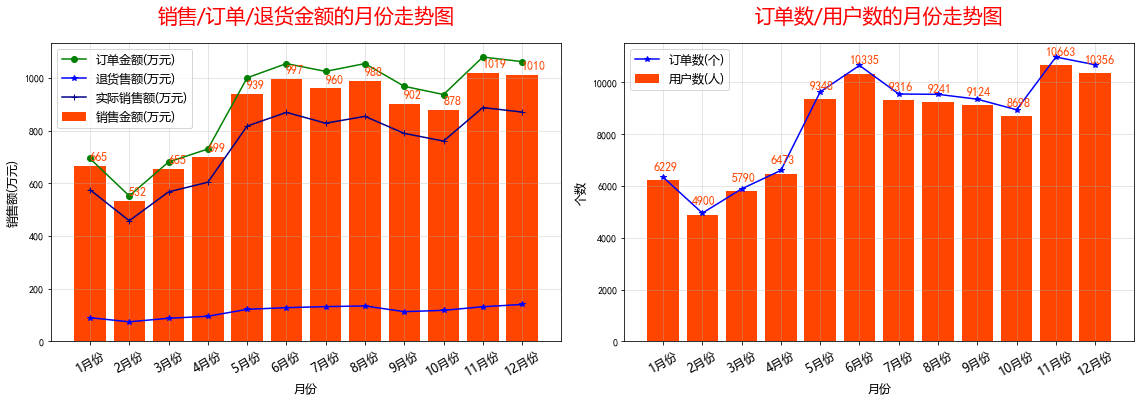

In [225]:
#绘制分析图
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\msyh.ttc',size=12)
x_ticks_label = ["{}月份".format(i) for i in month_df.index]
plt.figure(figsize=(16,10))

#月份走势图1
plt.subplot(221)
plt.xticks(month_df.index,x_ticks_label,rotation = 30,fontproperties = my_font)
plt.xlabel('月份',fontproperties=my_font)
plt.ylabel("销售额(万元)",fontproperties=my_font)
plt.title('销售/订单/退货金额的月份走势图',fontproperties=my_font,color='red',size=20,pad=20)
plt.plot(month_df.index,month_df.orderAmount/10000,label='订单金额(万元)',color="green",marker='o')
plt.bar(month_df.index,month_df.payment/10000,label='销售金额(万元)',color="orangered")
plt.plot(month_df.index,rebuy/10000,label='退货售额(万元)',color="blue",marker='*')
plt.plot(month_df.index,realbuy/10000,label='实际销售额(万元)',color="darkblue",marker = '+')
for a,b in zip(month_df.index,month_df.payment):
    plt.text(s='%.f'%(b/10000),x=a,y=b/10000+20,fontsize=12,color="orangered")
plt.legend(prop=my_font,loc='upper left')
plt.grid(alpha=0.4)

#月份走势图2
plt.subplot(222)
plt.xticks(month_df.index,x_ticks_label,rotation = 30,fontproperties = my_font)
plt.xlabel('月份',fontproperties=my_font)
plt.ylabel("个数",fontproperties=my_font)
plt.title('订单数/用户数的月份走势图',fontproperties=my_font,color='red',size=20,pad=20)
plt.plot(month_df.index,month_df.orderID,label='订单数(个)',color="blue",marker='*')
plt.bar(month_df.index,month_df.userID,label='用户数(人)',color="orangered")
for a,b in zip(month_df.index,month_df.userID):
    plt.annotate('%.f'%(b),xy=(a,b),xytext=(-10,10),textcoords='offset points',color="orangered",fontsize=12)
plt.legend(prop=my_font,loc='upper left')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

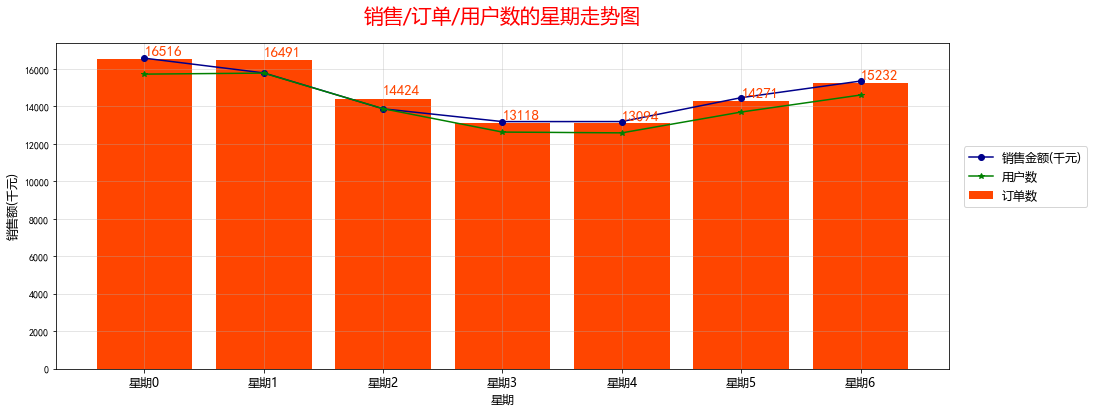

In [228]:
# 周走势图
x_ticks = ["星期{}".format(i) for i in week_df.index]
plt.figure(figsize=(16,6))

#月份走势图1
plt.xticks(week_df.index,x_ticks,rotation =0,fontproperties = my_font)
plt.xlabel('星期',fontproperties=my_font)
plt.ylabel("销售额(千元)",fontproperties=my_font)
plt.title('销售/订单/用户数的星期走势图',fontproperties=my_font,color='red',size=20,pad=20)
plt.plot(week_df.index,week_df.payment/1000,label='销售金额(千元)',color="darkblue",marker='o')
plt.bar(week_df.index,week_df.orderID,label='订单数',color="orangered")
plt.plot(week_df.index,week_df.userID,label='用户数',color="green",marker='*')
for a,b in zip(week_df.index,week_df.orderID):
    plt.text(s='%.f'%(b),x=a,y=b+200,fontsize=15,color="orangered")
plt.legend(prop=my_font,loc='best',bbox_to_anchor=[1.01,0.7])
plt.grid(alpha=0.4)
plt.show()

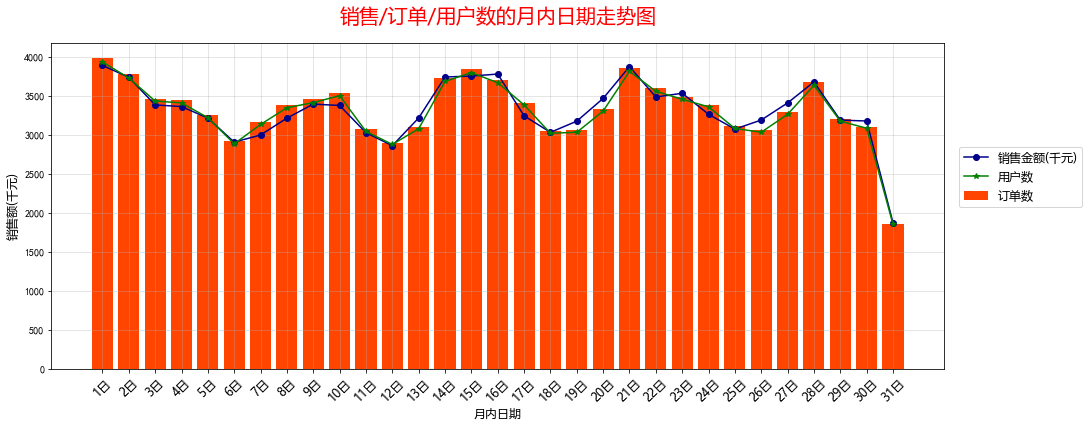

In [230]:
# 日走势图
x_ticks = ["{}日".format(i) for i in day_df.index]
plt.figure(figsize=(16,6))

#月份走势图1
plt.xticks(day_df.index,x_ticks,rotation =45,fontproperties = my_font)
plt.xlabel('月内日期',fontproperties=my_font)
plt.ylabel("销售额(千元)",fontproperties=my_font)
plt.title('销售/订单/用户数的月内日期走势图',fontproperties=my_font,color='red',size=20,pad=20)
plt.plot(day_df.index,day_df.payment/1000,label='销售金额(千元)',color="darkblue",marker='o')
plt.bar(day_df.index,day_df.orderID,label='订单数',color="orangered")
plt.plot(day_df.index,day_df.userID,label='用户数',color="green",marker='*')
plt.legend(prop=my_font,loc='best',bbox_to_anchor=[1.01,0.7] )
plt.grid(alpha=0.4)
plt.show()

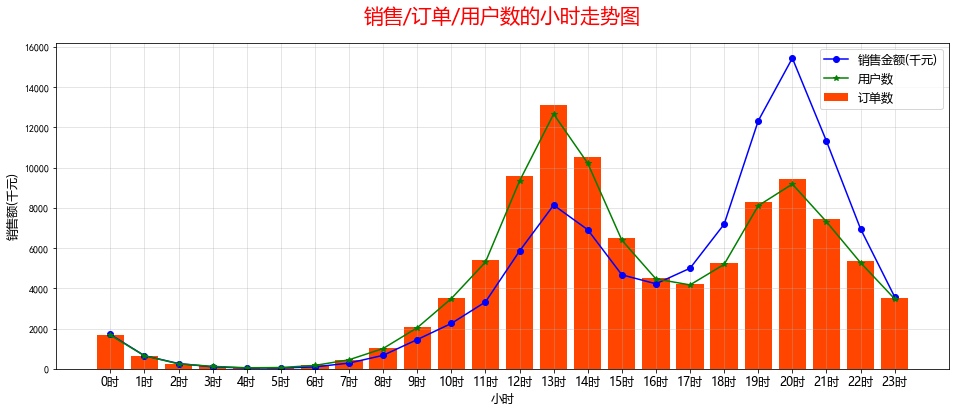

In [232]:
# 日走势图
x_ticks = ["{}时".format(i) for i in hour_df.index]
plt.figure(figsize=(16,6))

#月份走势图1
plt.xticks(hour_df.index,x_ticks,rotation =0,fontproperties = my_font)
plt.xlabel('小时',fontproperties=my_font)
plt.ylabel("销售额(千元)",fontproperties=my_font)
plt.title('销售/订单/用户数的小时走势图',fontproperties=my_font,color='red',size=20,pad=20)
plt.plot(hour_df.index,hour_df.payment/1000,label='销售金额(千元)',color="blue",marker='o')
plt.bar(hour_df.index,hour_df.orderID,label='订单数',color="orangered")
plt.plot(hour_df.index,hour_df.userID,label='用户数',color="green",marker='*')
plt.legend(prop=my_font,loc='best')
plt.grid(alpha=0.4)
plt.show()

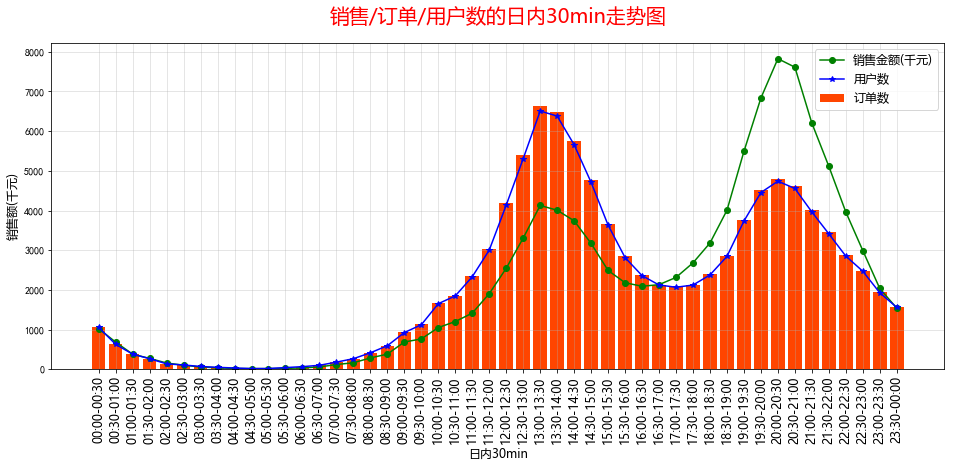

In [233]:
# 30min走势图
plt.figure(figsize=(16,6))

#月份走势图1
plt.xticks(range(len(time_df)),time_df.index,rotation =90,fontproperties = my_font)
plt.xlabel('日内30min',fontproperties=my_font)
plt.ylabel("销售额(千元)",fontproperties=my_font)
plt.title('销售/订单/用户数的日内30min走势图',fontproperties=my_font,color='red',size=20,pad=20)
plt.plot(time_df.index,time_df.payment/1000,label='销售金额(千元)',color="green",marker='o')
plt.bar(x=time_df.index,height=time_df.orderID,label='订单数',color="orangered")
plt.plot(time_df.index,time_df.userID,label='用户数',color="blue",marker='*')
plt.legend(prop=my_font,loc='best')
plt.grid(alpha=0.4)
plt.show()

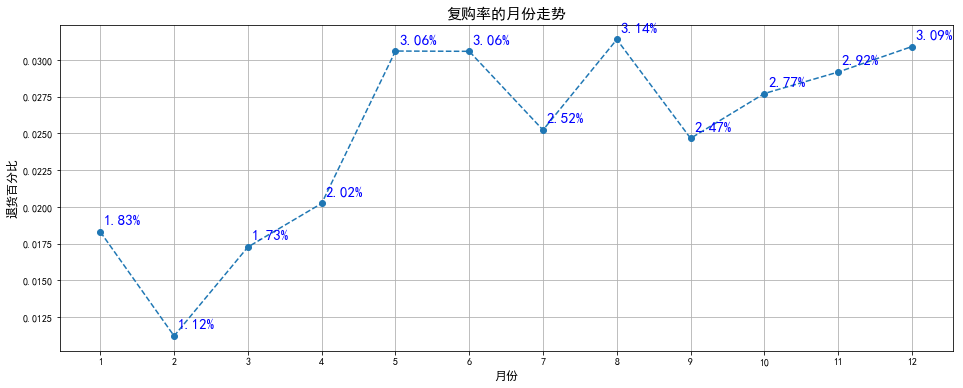

In [199]:
#用户活跃度——复购率(大于一个订单数/用户数)与月份的关系                    
order_counts=data.pivot_table(index='userID',columns='month',values='orderID',aggfunc={'orderID':'count'})
#方法一
rebuy_ratio=order_counts.apply(lambda x: x[x>=2].count())/order_counts.apply(lambda x: x.count())  #count 不计算nan
#方法二
#rebuy_ratio1=order_counts.applymap(lambda x: 1 if x>1 else 0 if x==1 else np.NaN)
#rebuy_ratio1.sum()/rebuy_ratio1.count()
rebuy_ratio.plot(figsize=(16,6),grid=True,style='o--')
plt.title('复购率的月份走势',fontsize=15)
plt.xlabel('月份',fontsize=12)
plt.ylabel('退货百分比',fontsize=12)
plt.xticks(range(1,len(rebuy_ratio)+1),rebuy_ratio.index)
for x,y in zip(rebuy_ratio.index,rebuy_ratio.values):
    plt.text(x=x+0.05,y=y+0.0005,s='%.2f%%'%(y*100),fontsize=15,color='blue')

In [23]:
#用户活跃度——复购周期（第一次销售后第二次消费时间差） 
#保留前两个时间记录
buy_days=data.groupby('userID')['orderTime'].apply(lambda x: x if x.size<=2 else x.drop(index=x.index[2:]))

In [183]:
#  计算第二次购买与第一次购买的间隔天数
#days=buy_days.groupby('userID').apply(lambda x: x.max()-x.min()).dt.days  #运行慢
days=(buy_days.groupby('userID').max()-buy_days.groupby('userID').min()).dt.days

In [188]:
onebuys=days[days==0].size

twobuys=days.drop(index=days[days==0].index).value_counts().sort_index().reset_index()
twobuys['days_interview']=pd.cut(twobuys.index,bins=[0,3,7,15,30,90,180,360],right=False,
                                 labels=['1-3','3-7','7-15','15-30','30-90','90-180','180-360'])
tatol_days=twobuys.groupby('days_interview')['orderTime'].sum()
twobuys.rename(columns={'index':'days','orderTime':'users'},inplace=True)
twobuys.head()

,days,users,days_interview
0,1,147,1-3
1,2,135,1-3
2,3,124,1-3
3,4,111,3-7
4,5,101,3-7


Text(-0.5,6000,'人均复购天数：111天')

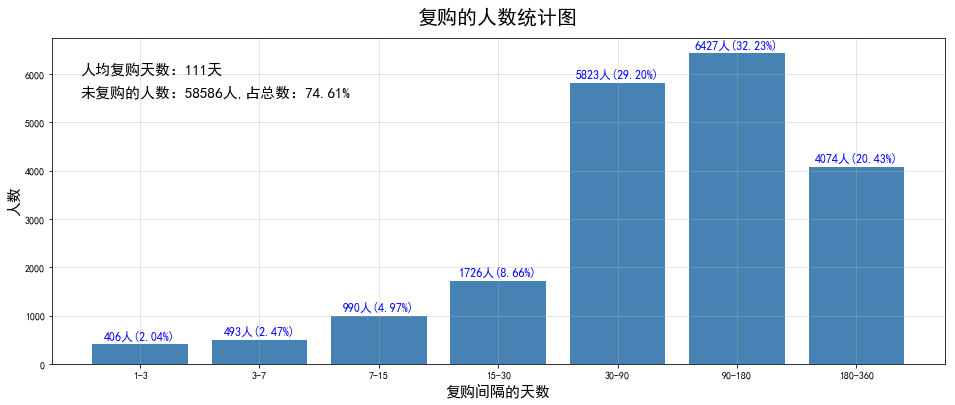

In [195]:
plt.figure(figsize=(16,6))
plt.bar(x=tatol_days.index,height=tatol_days,color='steelblue')
plt.title('复购的人数统计图',pad=15,fontsize=20)
plt.xlabel('复购间隔的天数',fontsize=15)
plt.ylabel('人数',fontsize=15)
plt.grid(alpha=0.4)
for a,b in zip(tatol_days.index,tatol_days):
    plt.text(s='%.f人(%.2f%%)'%(b,b*100/tatol_days.sum()),x=a,y=b+50,ha='center',va='bottom',color="blue",fontsize=12)
plt.text(s='未复购的人数：%.f人,占总数：%.2f%%'%(onebuys,onebuys*100/len(days)),x=-0.5,y=5500,fontsize=15)
plt.text(s='人均复购天数：%.f天'%((twobuys['days']*twobuys['users']).sum()/twobuys['users'].sum()),x=-0.5,y=6000,fontsize=15)

Text(0,0.5,'人数')

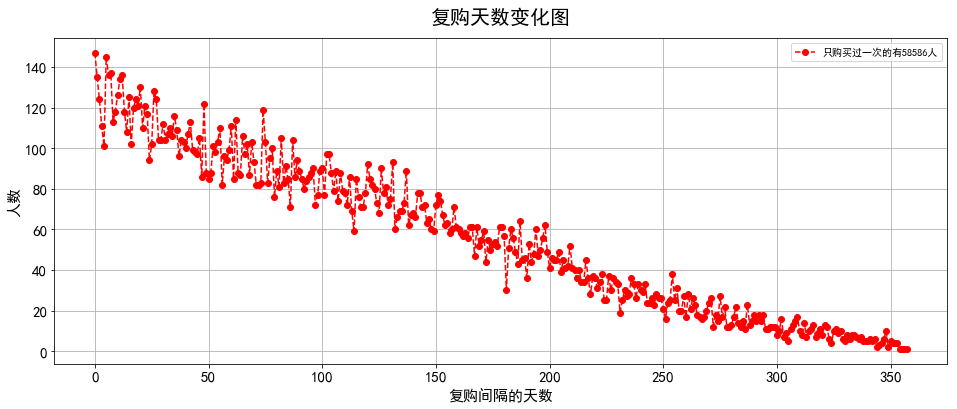

In [27]:
twobuys.orderTime.plot(figsize=(16,6),grid=True, legend=True, style='ro--',label=f'只购买过一次的有{onebuys}人',fontsize=15)
plt.title('复购天数变化图',pad=15,fontsize=20)
plt.xlabel('复购间隔的天数',fontsize=15)
plt.ylabel('人数',fontsize=15)

In [28]:
##分析用户的订单数，金额，折扣 支付时间 分布
user_df=data.pivot_table(index='userID',values=['orderAmount','payment','payInterval','Discount','orderID'],
                         aggfunc=({'orderAmount':np.sum,'payment':np.sum,'payInterval':np.mean,'Discount':np.mean,'orderID':np.size}))
user_df.describe()

,Discount,orderAmount,orderID,payInterval,payment
count,78525.000000,78525.000000,78525.000000,78525.000000,78525.000000
mean,0.917481,1379.833067,1.313543,59.771585,1304.838737
std,0.129894,1366.106255,0.593262,118.788315,1339.181108
min,0.000000,6.100000,1.000000,0.000000,0.000000
25%,0.900000,503.560000,1.000000,16.000000,452.650000
50%,0.960000,874.070000,1.000000,25.000000,811.690000
75%,1.000000,1836.550000,2.000000,51.000000,1744.910000
max,1.000000,32623.050000,7.000000,1788.000000,32493.010000


In [29]:
_odersID=user_df.orderID.value_counts()
user_df['amount']=pd.cut(user_df.orderAmount,bins=[6,50,100,500,1000,3000,8000,33000],right=False,
                         labels=['6-50','50-100','100-500','500-1000','1000-3000','3000-8000','8000-33000'])
user_df['inter']=pd.cut(user_df.payInterval,bins=[0,30,60,120,300,600,900,1800],right=False,
                         labels=['0-30','30-60','60-120','120-300','300-600','600-900','900-1800'])
user_df['discount']=pd.cut(user_df.Discount,bins=[0,0.90,0.92,0.94,0.96,0.98,0.99,1],right=False,
                         labels=['0-0.90','0.90-0.92','0.92-0.94','0.94-0.96','0.96-0.98','0.98-0.99','0.99-1'])
user_df.head()

,Discount,orderAmount,orderID,payInterval,payment,amount,inter,discount
userID,,,,,,,,
user-100000,0.900,1978.47,1,12.0,1770.81,1000-3000,0-30,0.90-0.92
user-100003,0.980,521.60,1,23.0,511.59,500-1000,0-30,0.98-0.99
user-100006,0.975,2803.90,2,31.0,2771.98,1000-3000,30-60,0.96-0.98
user-100007,0.990,2178.20,1,13.0,2162.14,1000-3000,0-30,0.99-1
user-100008,0.990,4949.65,1,24.0,4879.94,3000-8000,0-30,0.99-1


In [253]:
user_df.orderID.value_counts().iloc[0]

58464

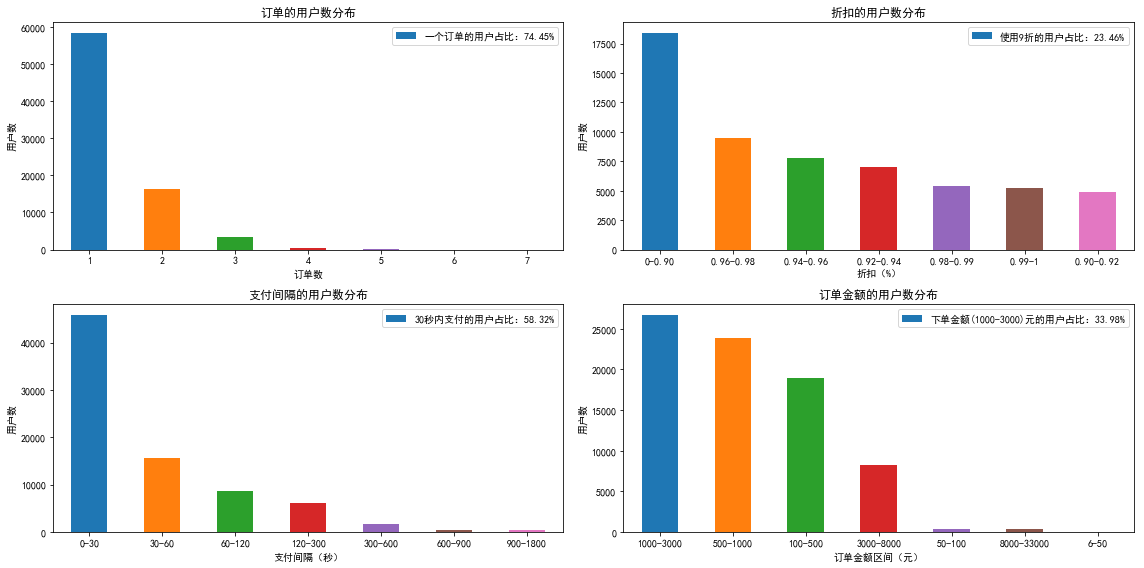

In [264]:
plt.figure(figsize=(16,8))
plt.subplot(221)
user_df.orderID.value_counts().plot(kind='bar',legend=True,
                                    label=f'一个订单的用户占比：{round(user_df.orderID.value_counts().iloc[0]*100/len(user_df),2)}%')
plt.xticks(rotation=0)
plt.title('订单的用户数分布')
plt.xlabel('订单数')
plt.ylabel('用户数')
plt.subplot(222)
user_df.discount.value_counts().plot(kind='bar',legend=True,
                                     label=f'使用9折的用户占比：{round(user_df.discount.value_counts().iloc[0]*100/len(user_df),2)}%')
plt.xticks(rotation=0)
plt.title('折扣的用户数分布')
plt.xlabel('折扣（%）')
plt.ylabel('用户数')
plt.subplot(223)
user_df.inter.value_counts().plot(kind='bar',legend=True,
                                  label=f'30秒内支付的用户占比：{round(user_df.inter.value_counts().iloc[0]*100/len(user_df),2)}%')
plt.xticks(rotation=0)
plt.title('支付间隔的用户数分布')
plt.xlabel('支付间隔（秒）')
plt.ylabel('用户数')
plt.subplot(224)
user_df.amount.value_counts().plot(kind='bar',legend=True,
                                   label=f'下单金额(1000-3000)元的用户占比：{round(user_df.amount.value_counts().iloc[0]*100/len(user_df),2)}%')
plt.xticks(rotation=0)
plt.title('订单金额的用户数分布')
plt.xlabel('订单金额区间（元）')
plt.ylabel('用户数')
plt.tight_layout()

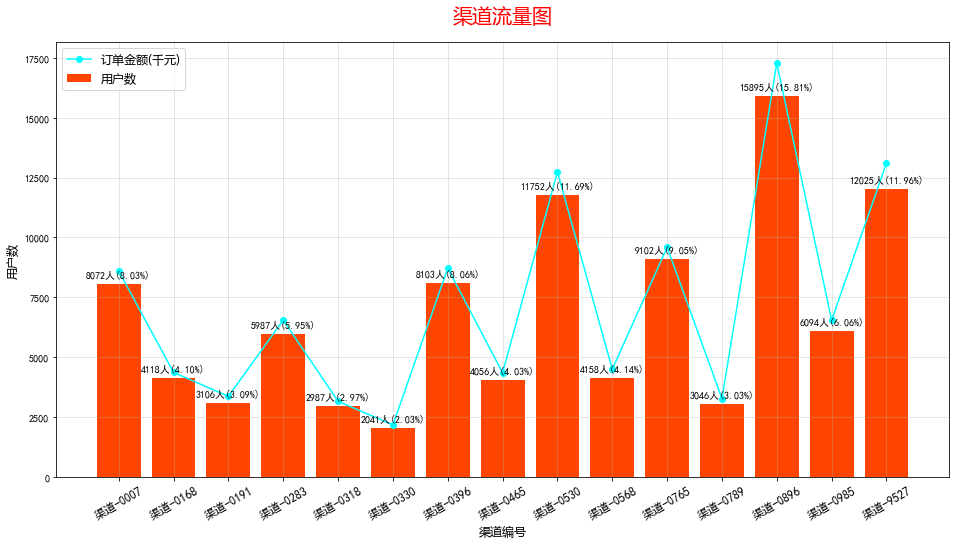

In [281]:
#3、与渠道来源的关系：1.用户/销量/订单与渠道的关系
chanell_df1=data.pivot_table(index='chanelID',values=['orderAmount','payment','orderID','userID'],
                         aggfunc=({'orderAmount':np.sum,'payment':np.sum,'orderID':np.size,'userID':'nunique'}))
plt.figure(figsize=(16,8))
plt.xticks(range(len(chanell_df1)),chanell_df1.index,fontsize=12,rotation=30)
plt.xlabel('渠道编号',fontproperties=my_font)
plt.ylabel("用户数",fontproperties=my_font)
plt.title('渠道流量图',fontproperties=my_font,color='red',size=20,pad=20)
plt.plot(chanell_df1.index,chanell_df1.orderAmount/1000,label='订单金额(千元)',color="cyan",marker='o')
plt.bar(chanell_df1.index,chanell_df1.userID,label='用户数',color="orangered")
for a,b in zip(chanell_df1.index,chanell_df1.userID):
    plt.text(x=a,y=b+200,s='%.f人(%.2f%%)'%(b,b*100/(chanell_df1.userID.sum())),va='bottom',ha='center',rotation=0)
plt.legend(prop=my_font,loc='upper left')
plt.grid(alpha=0.4)

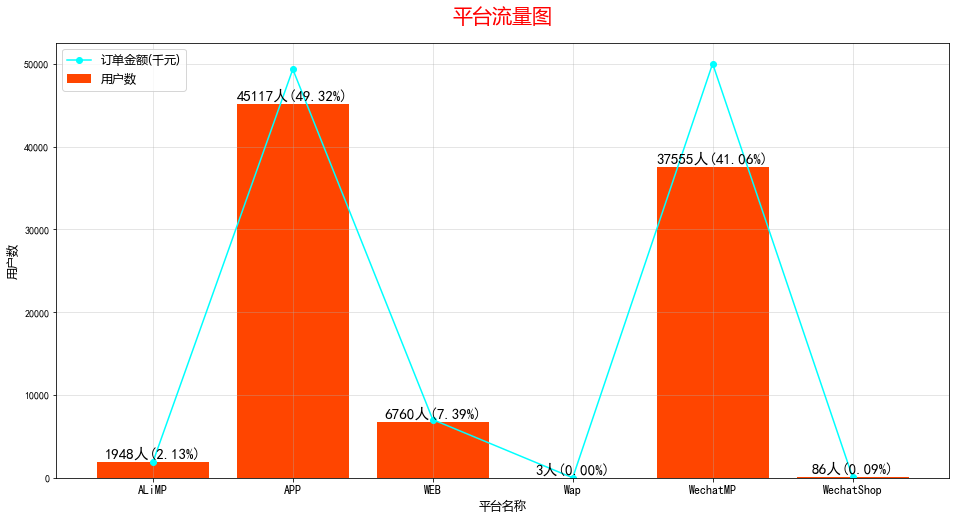

In [283]:
chanell_df2=data.pivot_table(index='platformType',values=['orderAmount','payment','orderID','userID'],
                         aggfunc=({'orderAmount':np.sum,'payment':np.sum,'orderID':np.size,'userID':'nunique'}))


plt.figure(figsize=(16,8))
plt.xticks(range(len(chanell_df2)),chanell_df2.index,fontsize=12,rotation=0)
plt.xlabel('平台名称',fontproperties=my_font)
plt.ylabel("用户数",fontproperties=my_font)
plt.title('平台流量图',fontproperties=my_font,color='red',size=20,pad=20)
plt.plot(chanell_df2.index,chanell_df2.orderAmount/1000,label='订单金额(千元)',color="cyan",marker='o')
plt.bar(chanell_df2.index,chanell_df2.userID,label='用户数',color="orangered")
for a,b in zip(chanell_df2.index,chanell_df2.userID):
    plt.text(x=a,y=b+200,s='%.f人(%.2f%%)'%(b,b*100/(chanell_df2.userID.sum())),va='bottom',ha='center',fontsize=15)
plt.legend(prop=my_font,loc='upper left')
plt.grid(alpha=0.4)

In [33]:
df.head()

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payInterval,Discount
id,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0,1.00
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0,0.97
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0,0.96
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0,0.95
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0,1.00


In [34]:
#4、客户的RFM等级评定
user_data=df.copy()
user_data.drop(index=user_data[user_data.chargeback=='是'].index,inplace=True)

rfm=user_data.groupby('userID').agg({'orderTime':'max','orderID':'size','orderAmount':'sum',})
rfm['R']=(data.orderTime.max()-rfm.orderTime).dt.days
rfm.rename(columns={'orderID':'F','orderAmount':'M'},inplace=True)
rfm.head()

,orderTime,F,M,R
userID,,,,
user-100000,2019-10-13 18:46:46,1,1978.47,79
user-100003,2019-05-24 13:04:05,1,521.60,221
user-100006,2019-11-14 15:37:19,1,466.89,47
user-100007,2019-01-14 18:45:35,1,2178.20,351
user-100008,2019-11-16 17:15:03,1,4949.65,45


In [35]:
rfm.describe()

,F,M,R
count,70493.000000,70493.000000,70493.000000
mean,1.270424,1332.341220,148.931284
std,0.548193,1318.826745,99.681192
min,1.000000,6.100000,0.000000
25%,1.000000,494.850000,60.000000
50%,1.000000,843.840000,138.000000
75%,1.000000,1762.990000,222.000000
max,7.000000,32623.050000,364.000000


In [36]:
def trans(x):
    level=x.apply(lambda x: '1' if x>=1 else '0')
    label=level.R+level.F+level.M
    dict={'011':'重要价值客户',
        '111':'重要唤回客户',
        '001':'重要深耕客户',
        '101':'重要挽留客户',
        '010':'潜力客户',
        '110':'一般维持客户',
        '000':'新客户',
        '100':'流失客户'
         }
    result=dict[label]
    return result

rfm['RFM']=rfm[['R','F','M']].apply(lambda x: x-x.mean()).apply(trans,axis=1)


Text(0.5,0,'用户类型')

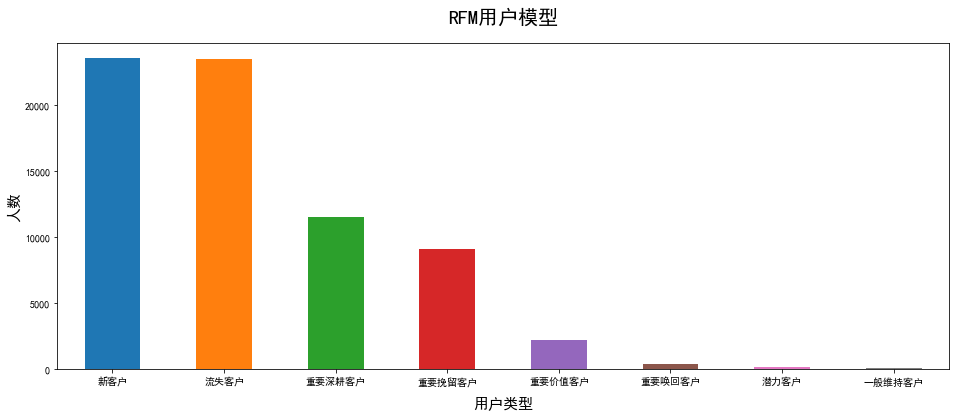

In [37]:
rfm.RFM.value_counts().plot(kind='bar',figsize=(16,6))
plt.xticks(rotation=0,fontsize=10)
plt.title('RFM用户模型',pad=20,fontsize=20)
plt.ylabel('人数',fontsize=15)
plt.xlabel('用户类型',fontsize=15,labelpad=10)

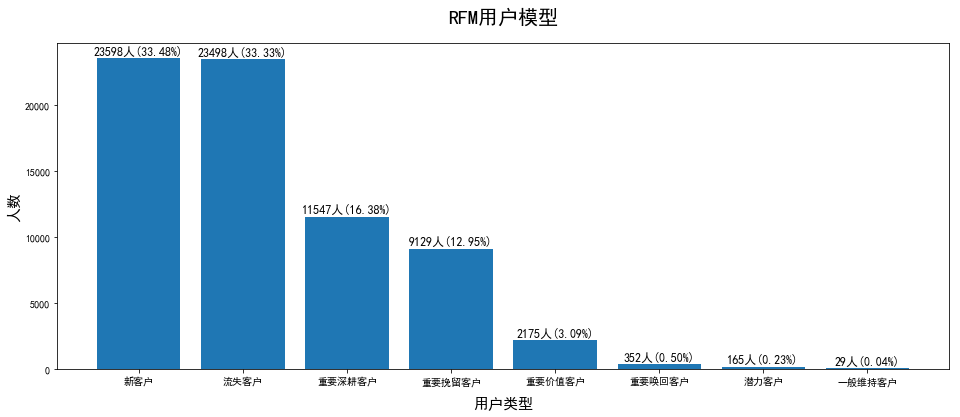

In [240]:
plt.figure(figsize=(16,6))
plt.bar(x=rfm.RFM.value_counts().index,height=rfm.RFM.value_counts())
plt.xticks(rotation=0,fontsize=10)
plt.title('RFM用户模型',pad=20,fontsize=20)
plt.ylabel('人数',fontsize=15)
plt.xlabel('用户类型',fontsize=15,labelpad=10)
for a,b in zip(rfm.RFM.value_counts().index,rfm.RFM.value_counts()):
    plt.text(x=a,y=b+100,s='%.f人(%.2f%%)'%(b,b*100/len(rfm)),va='bottom',ha='center',fontsize=12)

In [42]:
data.head()

,orderID,userID,goodsID,orderAmount,payment,chanelID,platformType,orderTime,payTime,chargeback,payInterval,Discount,month,week,day,hour,time_Interval
id,,,,,,,,,,,,,,,,,
6,sys-2019-279103297,user-146548,PR000564,425.20,425.20,渠道-0765,WechatMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否,74.0,1.00,1,1,1,0,00:00-00:30
7,sys-2019-316686066,user-104210,PR000709,1764.37,1707.04,渠道-0396,WechatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否,26.0,0.97,1,1,1,0,00:00-00:30
8,sys-2019-306447069,user-104863,PR000499,499.41,480.42,渠道-0007,WechatMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否,27.0,0.96,1,1,1,1,01:00-01:30
9,sys-2019-290267674,user-206155,PR000253,1103.00,1050.95,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否,13.0,0.95,1,1,1,1,01:00-01:30
10,sys-2019-337079027,user-137939,PR000768,465.41,465.41,渠道-9527,ALiMP,2019-01-01 01:31:00,2019-01-01 01:31:36,否,36.0,1.00,1,1,1,1,01:30-02:00


In [73]:
#商品的订单数，用户购买数，销售金额，退单数，折扣率
goods = data.groupby('goodsID').agg({'orderID':'size','userID':'nunique','orderAmount':'sum','chargeback':'size',
                             'Discount':'sum'})
goods=pd.concat([goods,data[data.chargeback=='是'].groupby('goodsID').size()],axis=1)
goods['Discount']=round(goods.Discount/goods.orderID,2)
goods['returnRate']=round(goods[0]/goods.chargeback,2)
goods.drop(['chargeback',0],axis=1,inplace=True)
goods.head()

,orderID,userID,orderAmount,Discount,returnRate
goodsID,,,,,
PR000001,103,103,84698.90,0.91,0.12
PR000002,172,172,216393.54,0.94,0.17
PR000003,37,37,79564.94,0.97,0.11
PR000004,95,95,157603.71,0.93,0.13
PR000005,126,126,99421.47,0.90,0.14


Text(0,0.5,'频数')

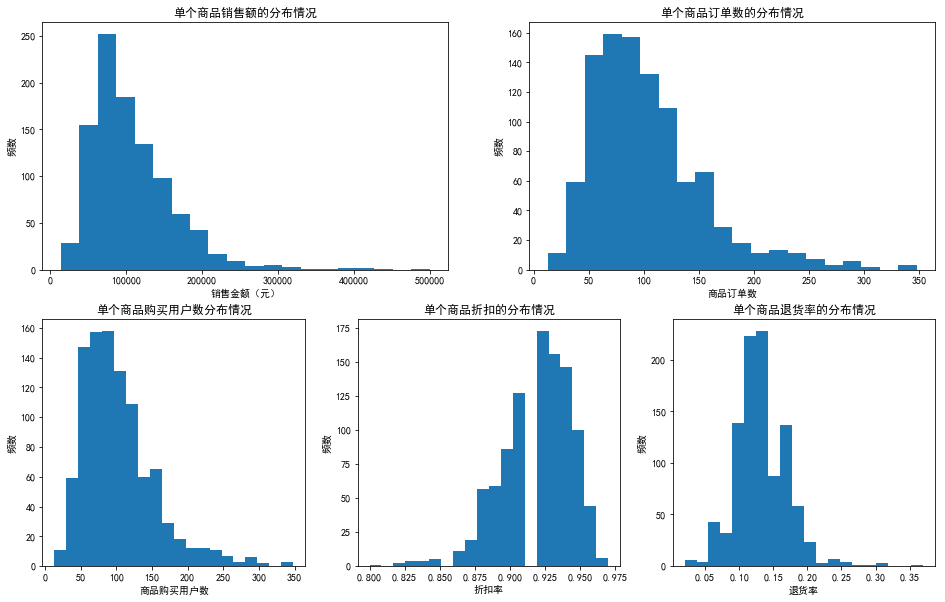

In [238]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.hist(x=goods.orderAmount,bins=20)
plt.title('单个商品销售额的分布情况')
plt.xlabel('销售金额（元）')
plt.ylabel('频数')

plt.subplot(222)
plt.hist(x=goods.orderID,bins=20)
plt.title('单个商品订单数的分布情况')
plt.xlabel('商品订单数')
plt.ylabel('频数')

plt.subplot(234)
plt.hist(x=goods.userID,bins=20)
plt.title('单个商品购买用户数分布情况')
plt.xlabel('商品购买用户数')
plt.ylabel('频数')

plt.subplot(235)
plt.hist(x=goods.Discount,bins=20,)
plt.title('单个商品折扣的分布情况')
plt.xlabel('折扣率')
plt.ylabel('频数')

plt.subplot(236)
plt.hist(x=goods.returnRate,bins=20)
plt.title('单个商品退货率的分布情况')
plt.xlabel('退货率')
plt.ylabel('频数')
